In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('ratings.csv')

In [6]:
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [7]:
df = df.rename(columns={
    'AKM1MP6P0OYPR': 'reviewerID',
    '0132793040': 'product_id',
    '5.0': 'rating',
    '1365811200': 'date'
})

In [8]:
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [9]:
 df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [10]:
df['userId'].value_counts()

,count
userId,
547,2391
564,1868
624,1735
15,1700
73,1610
...,...
296,20
289,20
249,20


In [11]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [23]:
user_id_counts = df['movieId'].value_counts()


len(user_id_counts[user_id_counts < 10])

3758

In [15]:

user_ids_to_remove = user_id_counts[user_id_counts < 2].index
df = df[~df['movieId'].isin(user_ids_to_remove)]

In [16]:
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [17]:
df.dtypes

,0
userId,int64
movieId,int64
rating,float64
timestamp,int64


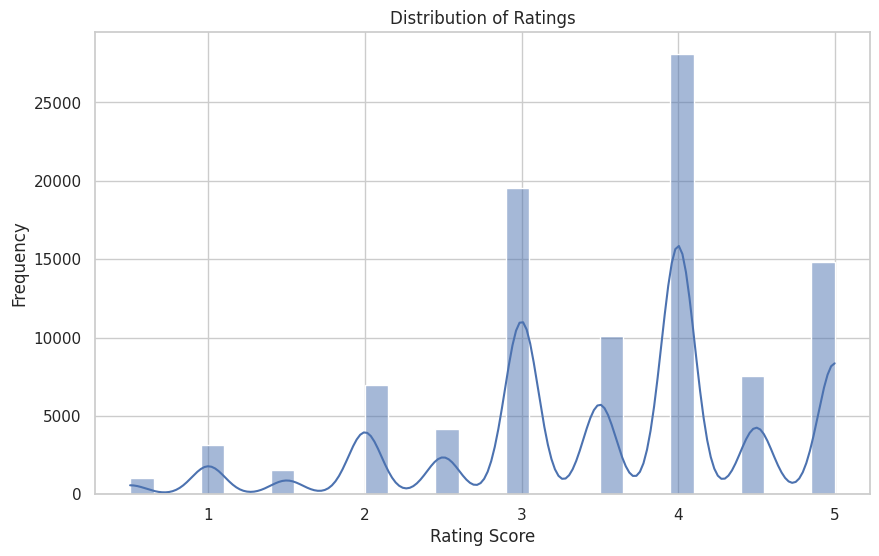

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Count unique values in userId and productId
unique_user_ids = df['movieId'].nunique()
unique_product_ids = df['userId'].nunique()

print(f"Unique User IDs: {unique_user_ids}")
print(f"Unique Product IDs: {unique_product_ids}")

Unique User IDs: 6003
Unique Product IDs: 671


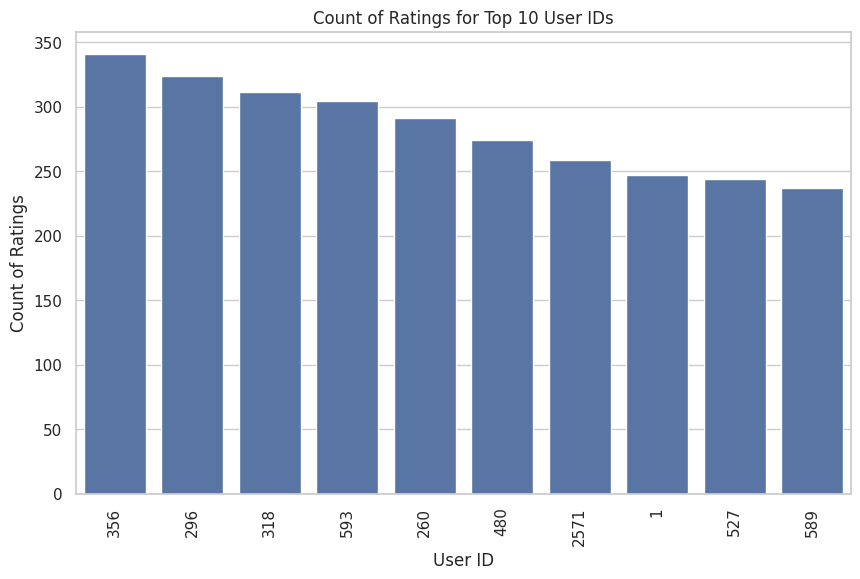

In [26]:
# Count of ratings per user
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent userIds
top_10_userIds = df['movieId'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 userIds
df_top_10 = df[df['movieId'].isin(top_10_userIds)]

# Plot the count of ratings for the top 10 userIds
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10, x='movieId', order=top_10_userIds)
plt.title('Count of Ratings for Top 10 User IDs')
plt.xlabel('User ID')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=90)
plt.show()



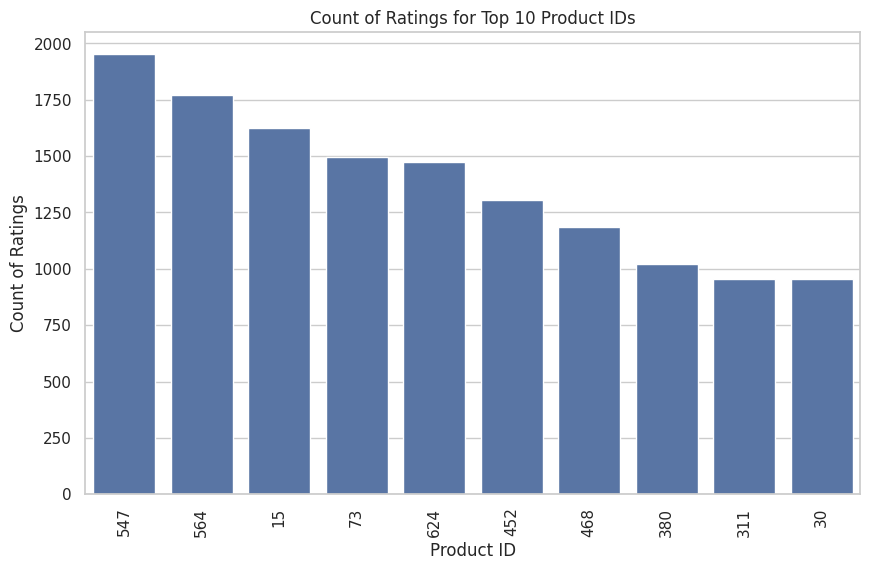

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent productIds
top_10_productIds = df['userId'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 productIds
df_top_10_products = df[df['userId'].isin(top_10_productIds)]

# Plot the count of ratings for the top 10 productIds
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_products, x='userId', order=top_10_productIds)
plt.title('Count of Ratings for Top 10 Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=90)
plt.show()


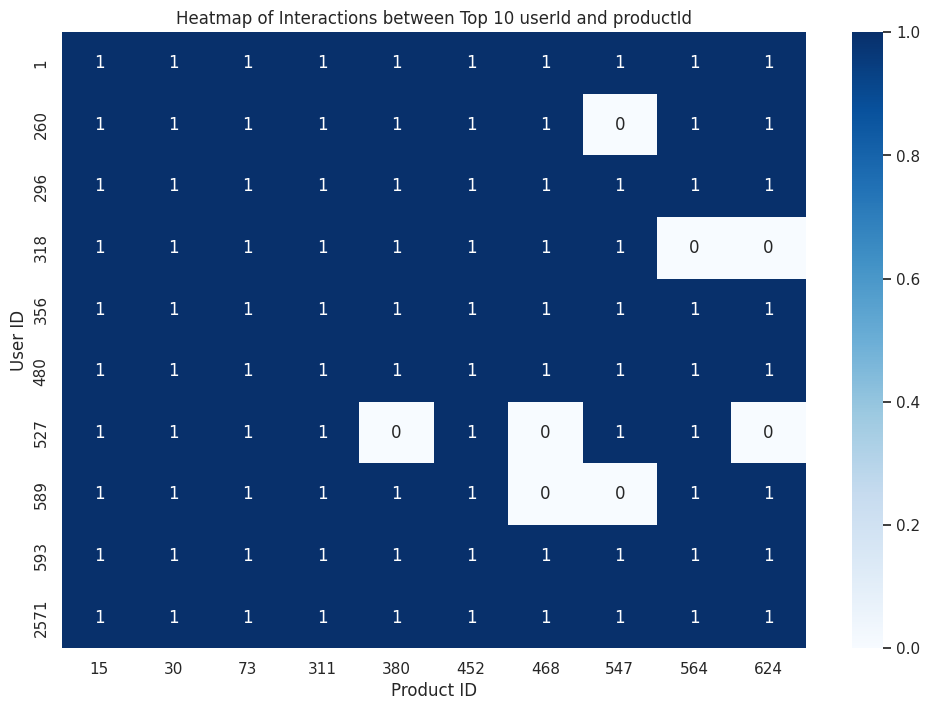

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 10 most frequent userIds
top_10_userIds = df['movieId'].value_counts().nlargest(10).index

# Get the top 10 most frequent productIds
top_10_productIds = df['userId'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 userIds and top 10 productIds
df_top_10 = df[(df['movieId'].isin(top_10_userIds)) & (df['userId'].isin(top_10_productIds))]

# Create a pivot table with userId as rows and productId as columns
interaction_matrix = df_top_10.pivot_table(index='movieId', columns='userId', values='rating', aggfunc='count', fill_value=0)

# Plot a heatmap of the interactions between top 10 userId and productId
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='Blues', cbar=True, annot=True, fmt="d")
plt.title('Heatmap of Interactions between Top 10 userId and productId')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()


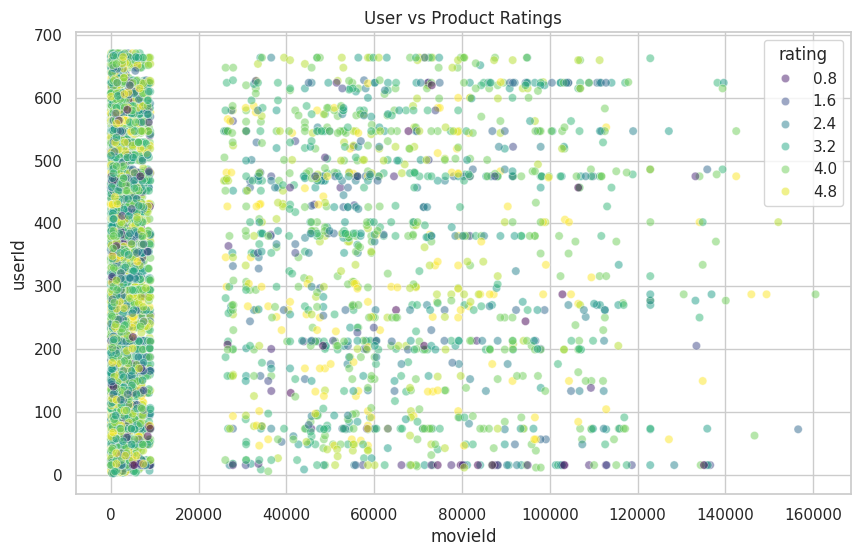

In [30]:
# Using a sample to avoid large data issues
df_sample = df.sample(n=min(10000, len(df)), random_state=42)  # Sample for visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='movieId', y='userId', hue='rating', palette='viridis', alpha=0.5)
plt.title('User vs Product Ratings')
plt.xlabel('movieId')
plt.ylabel('userId')
plt.show()

